This notebook illustrates a wrapper for using iGANs to interpolate, analogize, and so on.  It can be used to construct data for prototypes.

Make it so images and graphs can be displayed in Jupyter

In [1]:
%matplotlib inline

The module `aia` contains the basic interface to use with iGANs.  Ignore the warning.

Note that `aia.DPIX` and `aia.DPIY` are the number of horizontal and vertical pixels per inch for the monitor.  This is needed to get plot sizes right - unfortunately, matplotlib is dead set on working with inches, not pixels.   Ideally, it'd be set automatically, but for now I've set it for my monitor.

In [2]:
import aia; reload(aia)
aia.DPIX = 80.0
aia.DPIY = 68.0

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/usr/local/lib/python2.7/dist-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [92]:
hb = aia.Network("handbag_64")

LOADING...
('n_layers=', 3)
load model from ./models/handbag_64.dcgan_theano
3.12 seconds to load theano models
COMPILING...
1.24 seconds to compile _gen function
LOADING...
('n_layers=', 3)
load model from ./models/handbag_64.dcgan_theano
3.12 seconds to load theano models
COMPILING...
0.46 seconds to compile _gen function
COMPILING...
5.00 seconds to compile _bfgs function
COMPILING...
1.37 seconds to compile _feature function
COMPILING...
0.96 seconds to compile _predict function


Load and then display images from a remote URL.  In this case it's handbags at Amazon:

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:334: SNIMissingWarning: An HTTPS request has been made, but the SNI (Subject Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  SNIMissingWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/pac

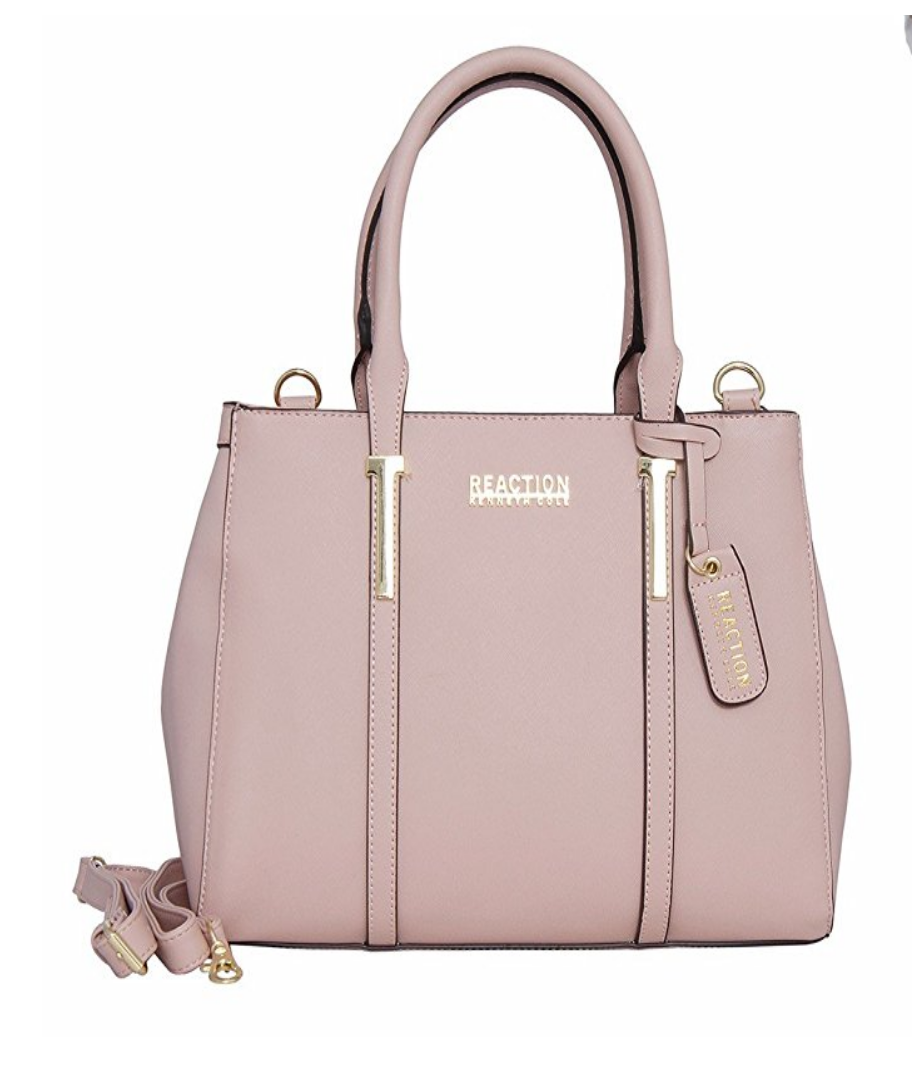

In [4]:
img0 = aia.get_image("https://images-na.ssl-images-amazon.com/images/I/61W8%2BjbJ23L._UY695_.jpg")
img1 = aia.get_image(url="https://images-na.ssl-images-amazon.com/images/I/91sYWII6-%2BL._UY695_.jpg")
aia.display_image(img0)

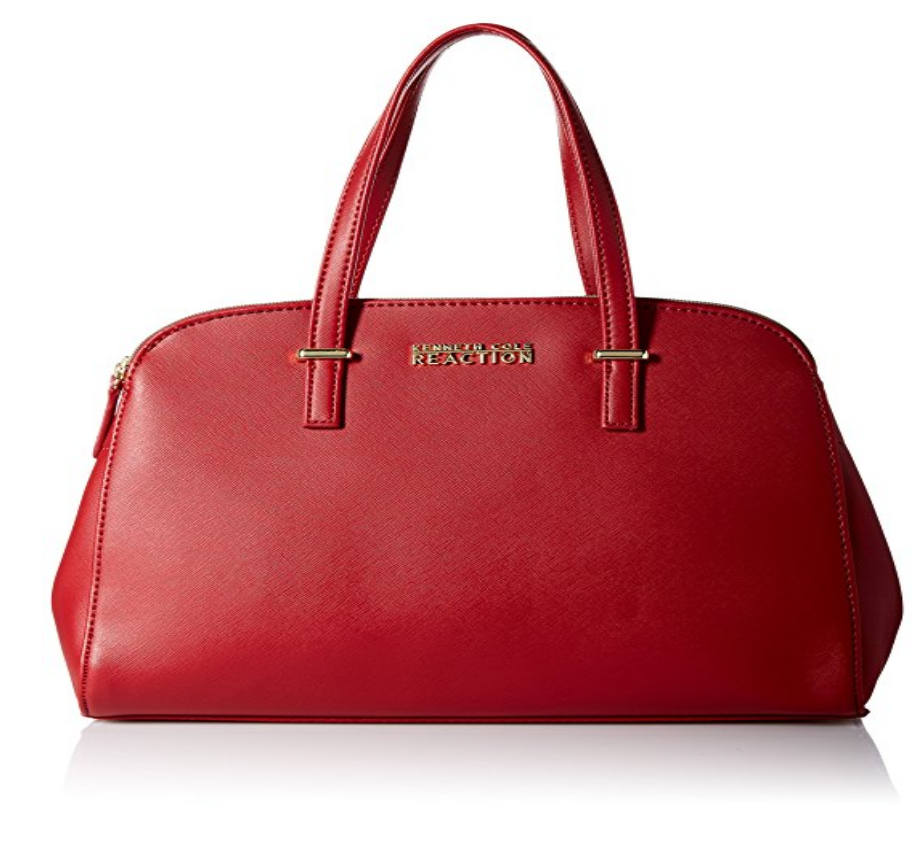

In [5]:
aia.display_image(img1)

We can get the latent vector for an image.  In this case, let's get the latent vector for the first image:

In [6]:
z0 = hb.get_lv(img0); print(z0)

process 1 images
reconstruct 1 images using bfgs
n_iters = 201, f = 0.161
[[-0.70417845  0.28234673  0.60171092 -0.47216916  0.2618255  -0.63557822
  -0.91231906  0.82678932 -0.27028409  0.12486827 -0.24693252 -0.11082278
   0.31541538  0.03416792 -0.90093148 -0.7972483  -0.36799645  0.25329044
   0.06871101  0.05485406  0.41998851  0.08767313  0.41076753  0.42246854
   0.19633912  0.78452355  0.14330167 -0.62073541 -0.07359518 -0.2220484
   0.10247653  0.53252876  0.10800064 -0.64907807  0.01290873  0.07761414
   0.71411896 -0.03805123 -0.16268514 -0.22975083 -0.82053691 -0.40718284
   0.18584968 -0.20738694 -0.04949404  0.65007287  0.02891628 -0.35142106
  -0.76715434 -0.8000747   0.13474485  0.37268874  0.24436152 -0.77910441
  -0.09461442  0.12841918  0.40523085 -0.31249213 -0.33838767 -0.22737318
  -0.73426163 -0.18707646 -0.51406848 -0.80765361 -0.31009245  0.77010822
   0.10924715  0.12739725  0.60309005  0.57267308 -0.64739656  0.37651914
  -0.54036927 -0.12785281 -0.61876416 -

We can also turn that latent vector back into an image.  As we'll see, it's not a bad approximation:

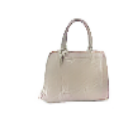

In [7]:
img0_approx = hb.imagify(z0)
aia.display_image(img0_approx)

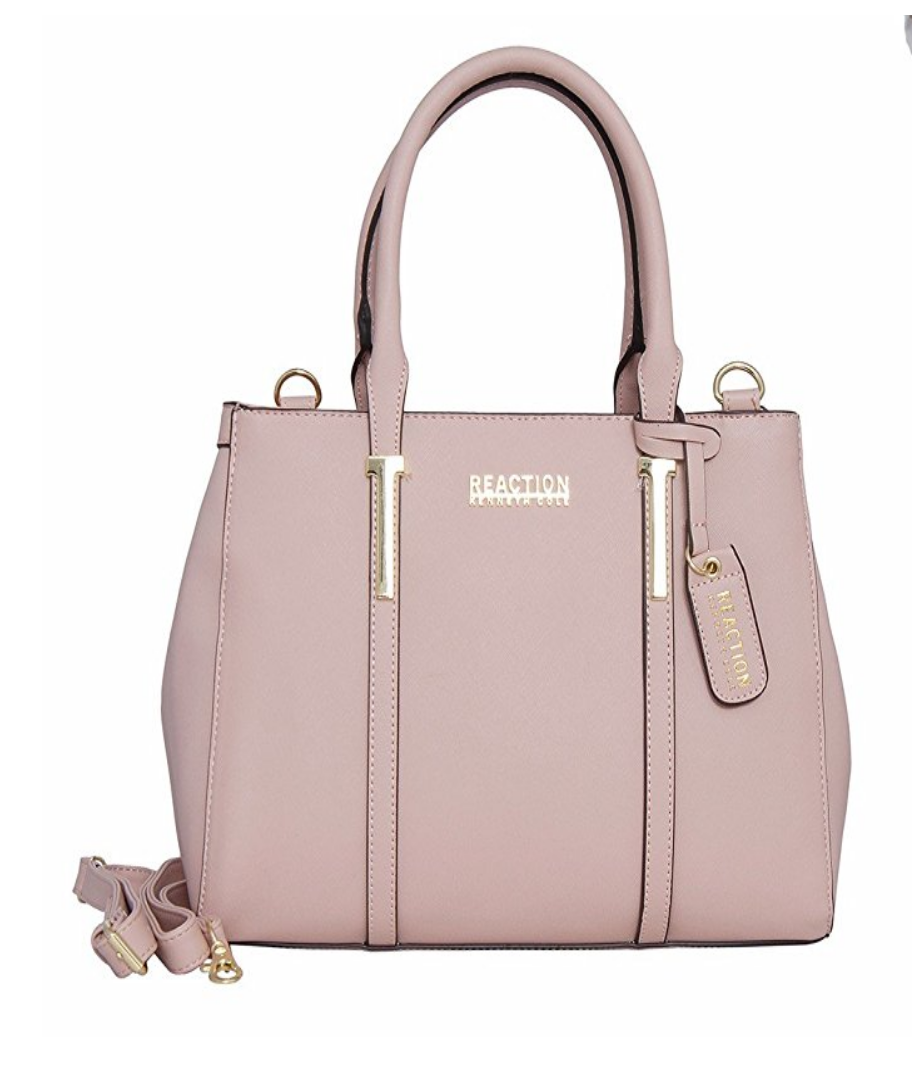

In [8]:
aia.display_image(img0)

It's easy to do interpolation with these primitives, plus the `aia.lerp` call.  Here's linear interpolation in the latent space.  Note that z0 was already computed earlier - it's recomputed here just for completeness.  We interpolate 40% of the way between the two images.

process 1 images
reconstruct 1 images using bfgs
n_iters = 201, f = 0.152
process 1 images
reconstruct 1 images using bfgs
n_iters = 201, f = 0.111


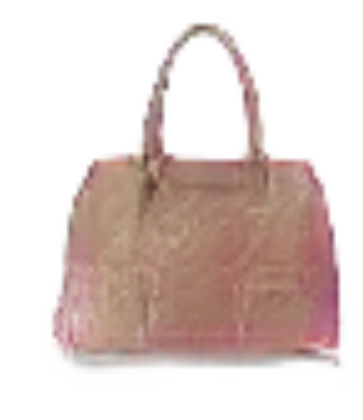

In [9]:
z0 = hb.get_lv(img0)
z1 = hb.get_lv(img1)
z_interp = aia.lerp(z0, z1, 0.4)
aia.display_image(hb.imagify(z_interp), scale=4.0)

We can also do this with spherical interpolation, and the `aia.serp` call.  I think this looks a little smoother, though maybe that's just wishful thinking:

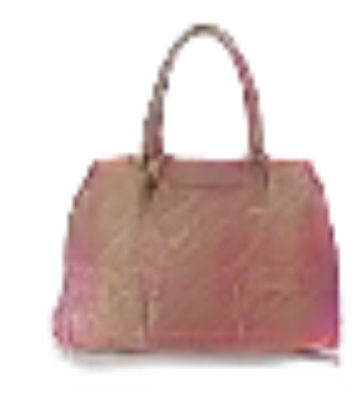

In [10]:
z_interp = aia.serp(z0, z1, 0.4)
aia.display_image(hb.imagify(z_interp), scale=4.0)

Note that it might be convenient to wrap these interpolation operations up a bit further.  I haven't yet done so, but if common patterns arise it'd be good to do so.

Let's do some interpolation and extrapolation:

In [11]:
vis = hb.interpolate_full(img0, img1, interp=aia.lerp)

process 1 images
reconstruct 1 images using bfgs
n_iters = 201, f = 0.164
process 1 images
reconstruct 1 images using bfgs
n_iters = 201, f = 0.111
(64, 100)
(64, 100)
(64, 3, 64, 64)


/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
lib/utils.py:138: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  img[j * h:j * h + h, i * w:i * w + w, :] = x


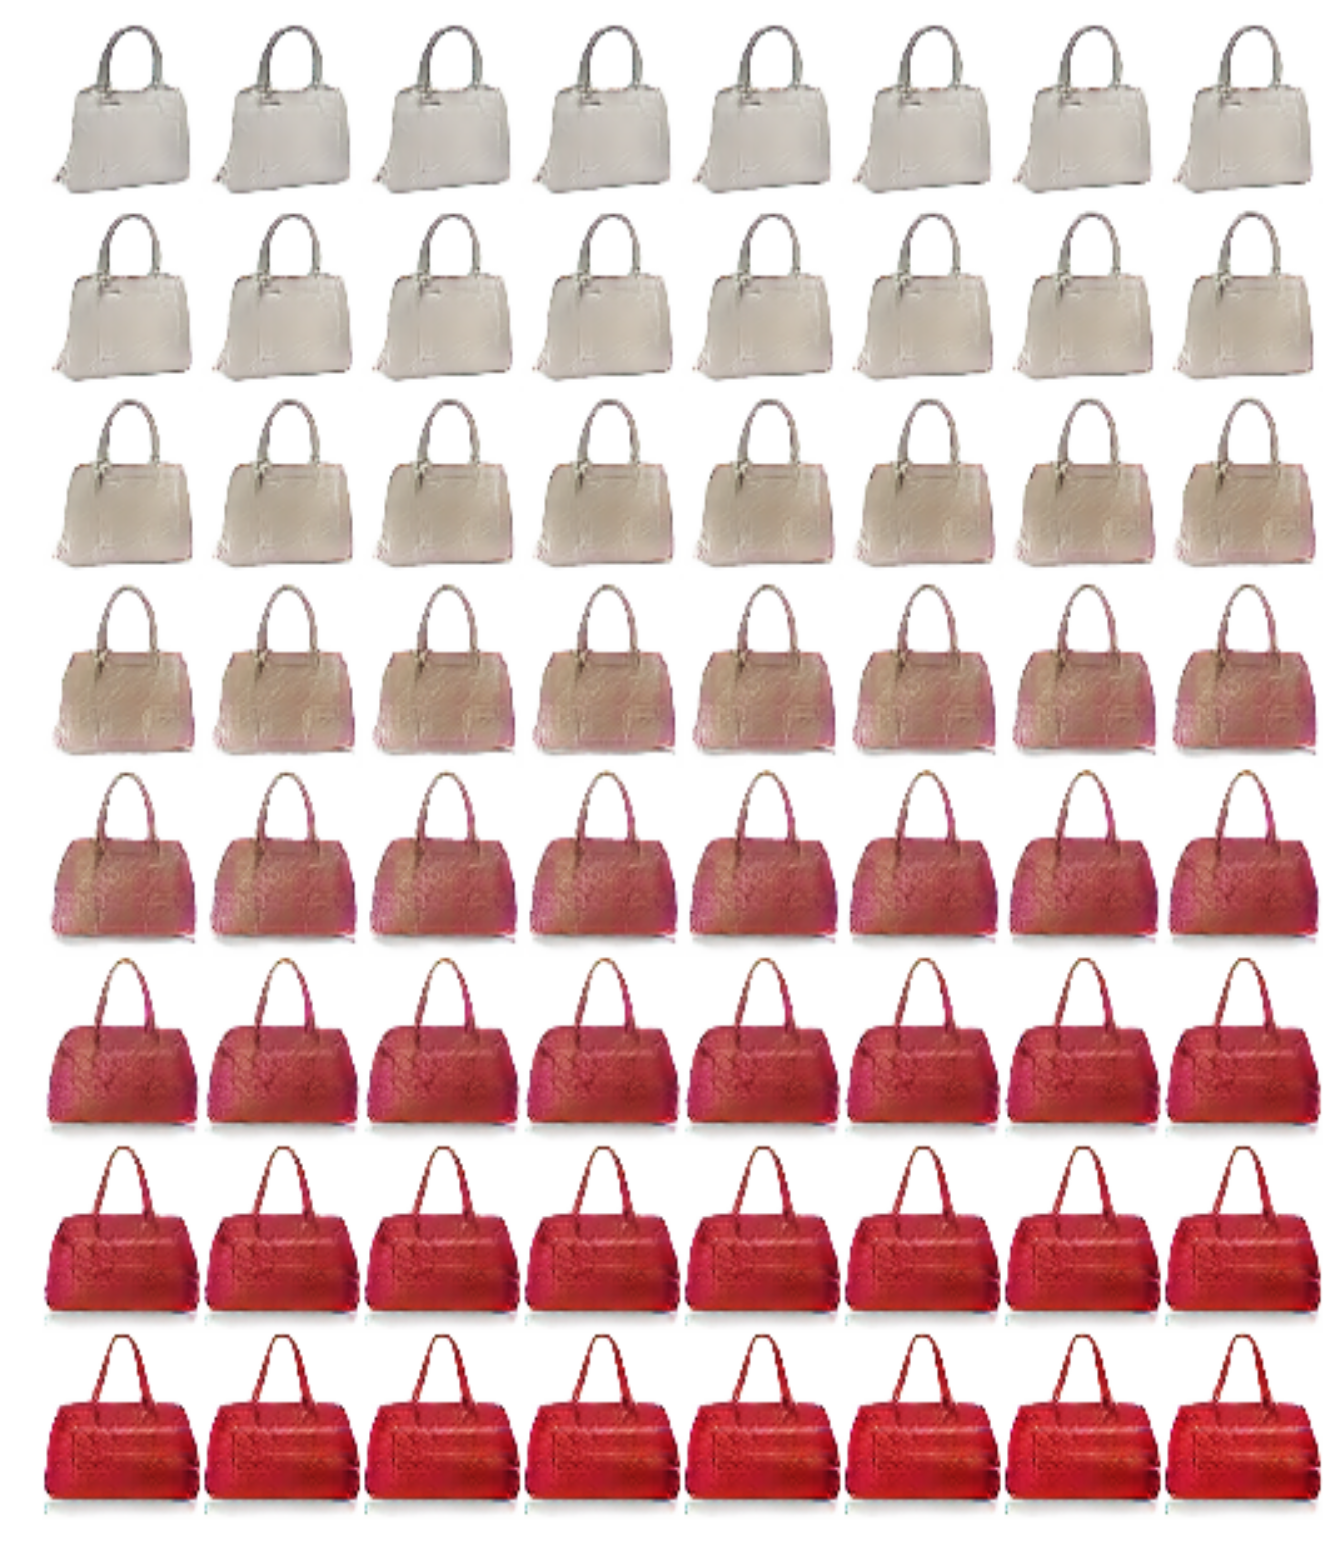

In [12]:
aia.display_image(vis, scale=2.0)

A rather fascinating thing is that upon extrapolation the first handbag is turned to the left.  I didn't notice at first, but actually there are a number of subtle things about the handbag that indicate it's turned slightly to the left (this is clear if you look closely).

Now do it using spherical interpolation (the default), rather than linear.  This is just the default:

In [13]:
vis = hb.interpolate_full(img0, img1)

process 1 images
reconstruct 1 images using bfgs
n_iters = 201, f = 0.157
process 1 images
reconstruct 1 images using bfgs
n_iters = 201, f = 0.110
(64, 100)
(64, 100)
(64, 3, 64, 64)


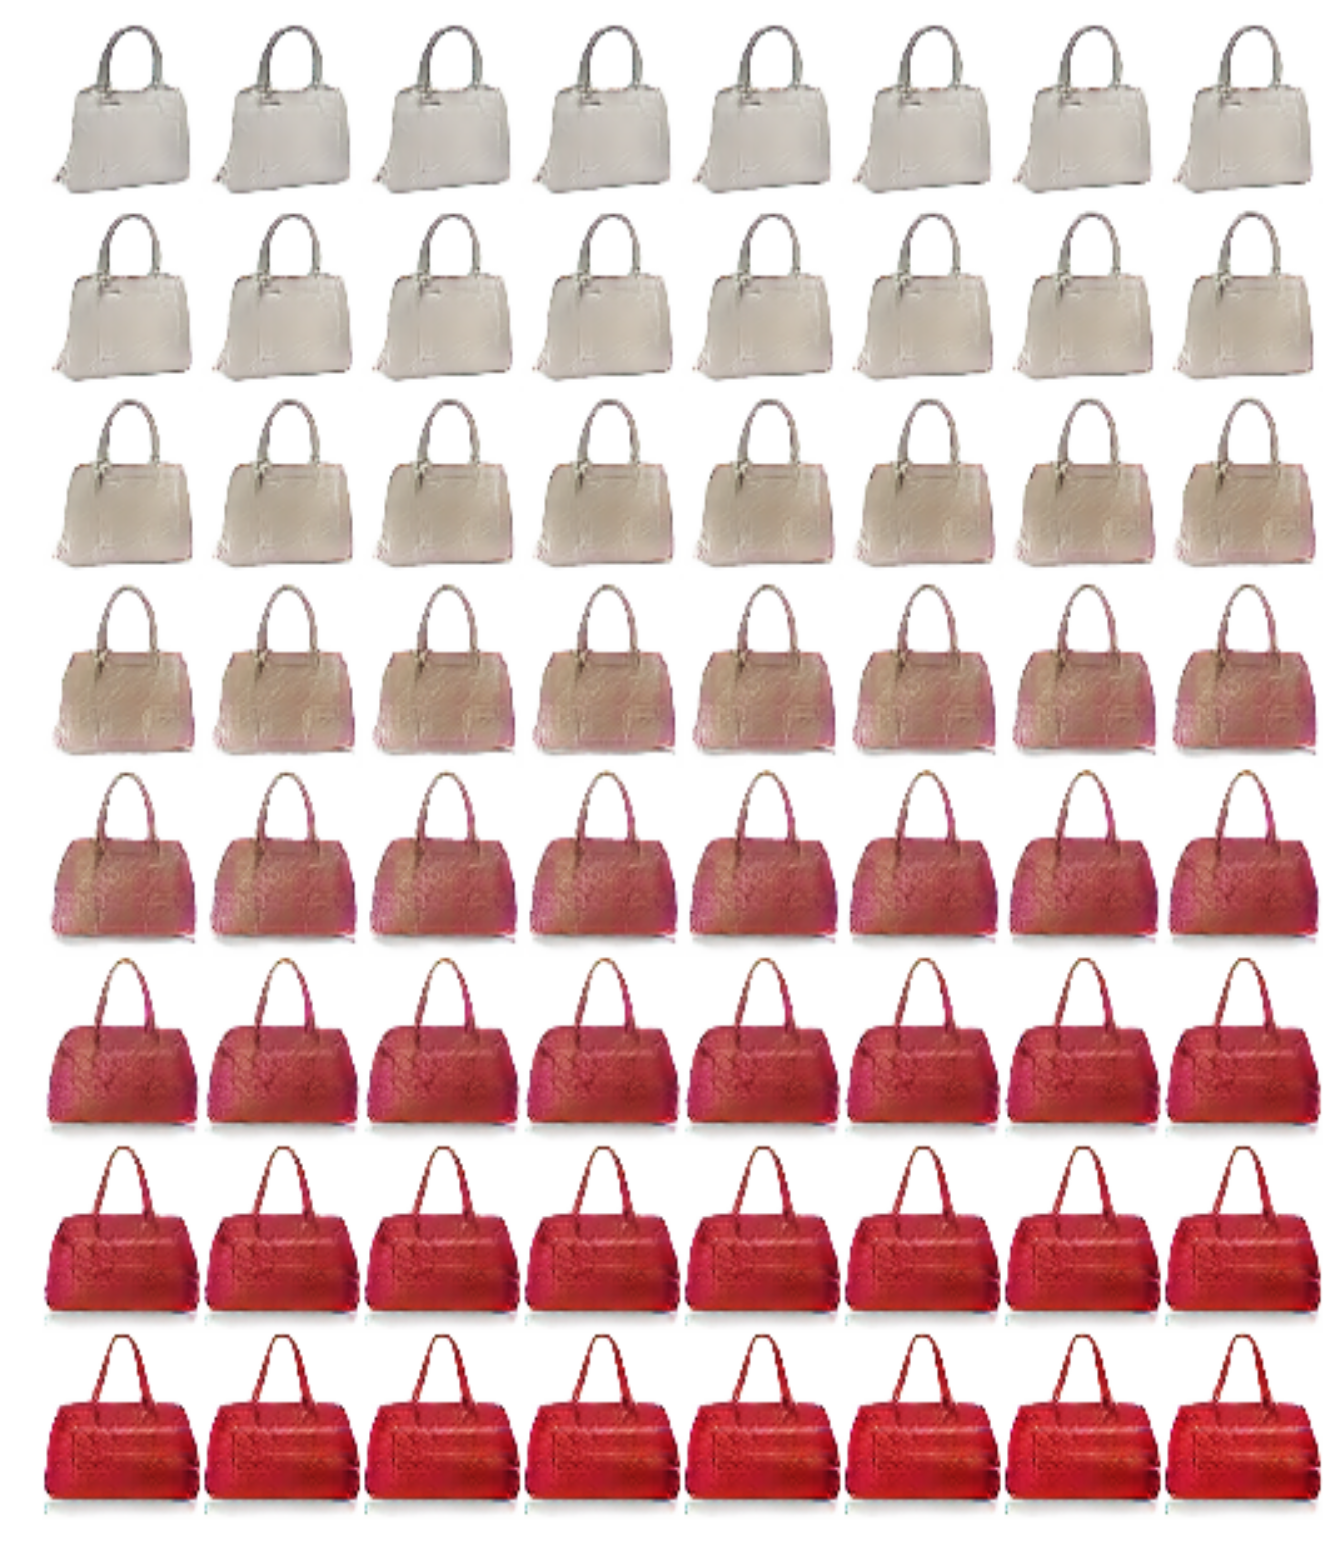

In [14]:
aia.display_image(vis, scale=2.0)

Let's add in some analogies.  We'll start by loading another handbag:

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning


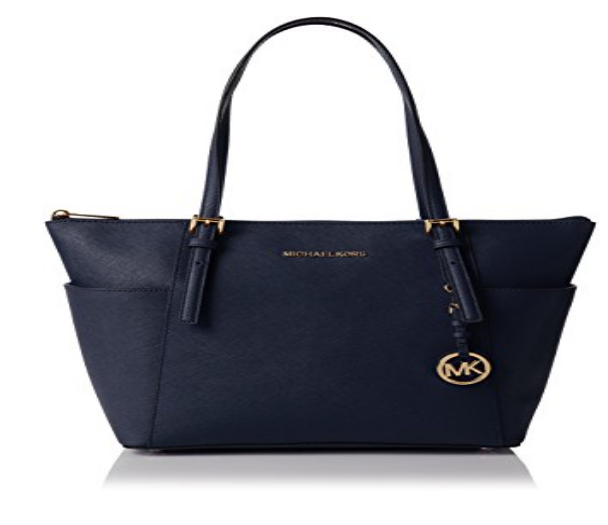

In [83]:
img2 = aia.get_image("https://images-na.ssl-images-amazon.com/images/I/91N8SLnO1UL._UY445_.jpg")
aia.display_image(img2)

process 1 images
reconstruct 1 images using bfgs
n_iters = 201, f = 0.115


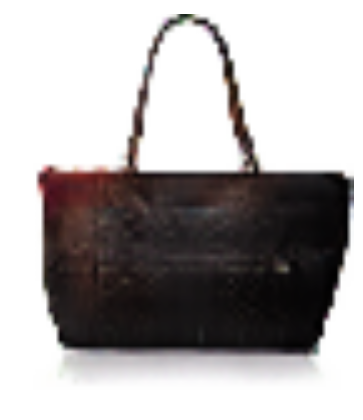

In [16]:
aia.display_image(hb.imagify(hb.analogize(z0, z1, hb.get_lv(img2))), 
                  scale=4.0)

In [17]:
img = hb.imagify(hb.analogize(z0, z1, hb.get_lv(img2)))

process 1 images
reconstruct 1 images using bfgs
n_iters = 201, f = 0.107


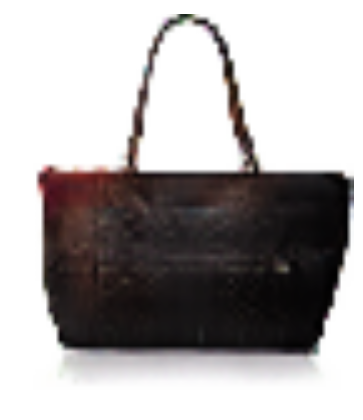

In [18]:
aia.display_image(img, scale=4.0)

In [19]:
shoes = aia.Network("shoes_64")

LOADING...
('n_layers=', 3)
load model from ./models/shoes_64.dcgan_theano
3.12 seconds to load theano models
COMPILING...
0.80 seconds to compile _gen function
LOADING...
('n_layers=', 3)
load model from ./models/shoes_64.dcgan_theano
3.06 seconds to load theano models
COMPILING...
0.45 seconds to compile _gen function
COMPILING...
5.12 seconds to compile _bfgs function
COMPILING...
1.35 seconds to compile _feature function
COMPILING...
1.51 seconds to compile _predict function


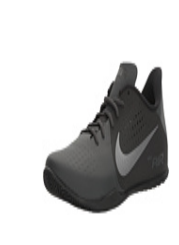

In [20]:
img2 = aia.get_image("http://a3.zassets.com/images/z/3/8/8/3/9/8/3883981-t-THUMBNAIL.jpg")
aia.display_image(img2)

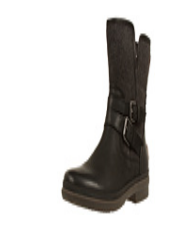

In [21]:
img3 = aia.get_image("http://a2.zassets.com/images/z/2/7/8/1/3/6/2781366-t-THUMBNAIL.jpg")
aia.display_image(img3)

process 1 images
reconstruct 1 images using bfgs
n_iters = 201, f = 0.106
process 1 images
reconstruct 1 images using bfgs
n_iters = 201, f = 0.091
(64, 100)
(64, 100)
(64, 3, 64, 64)


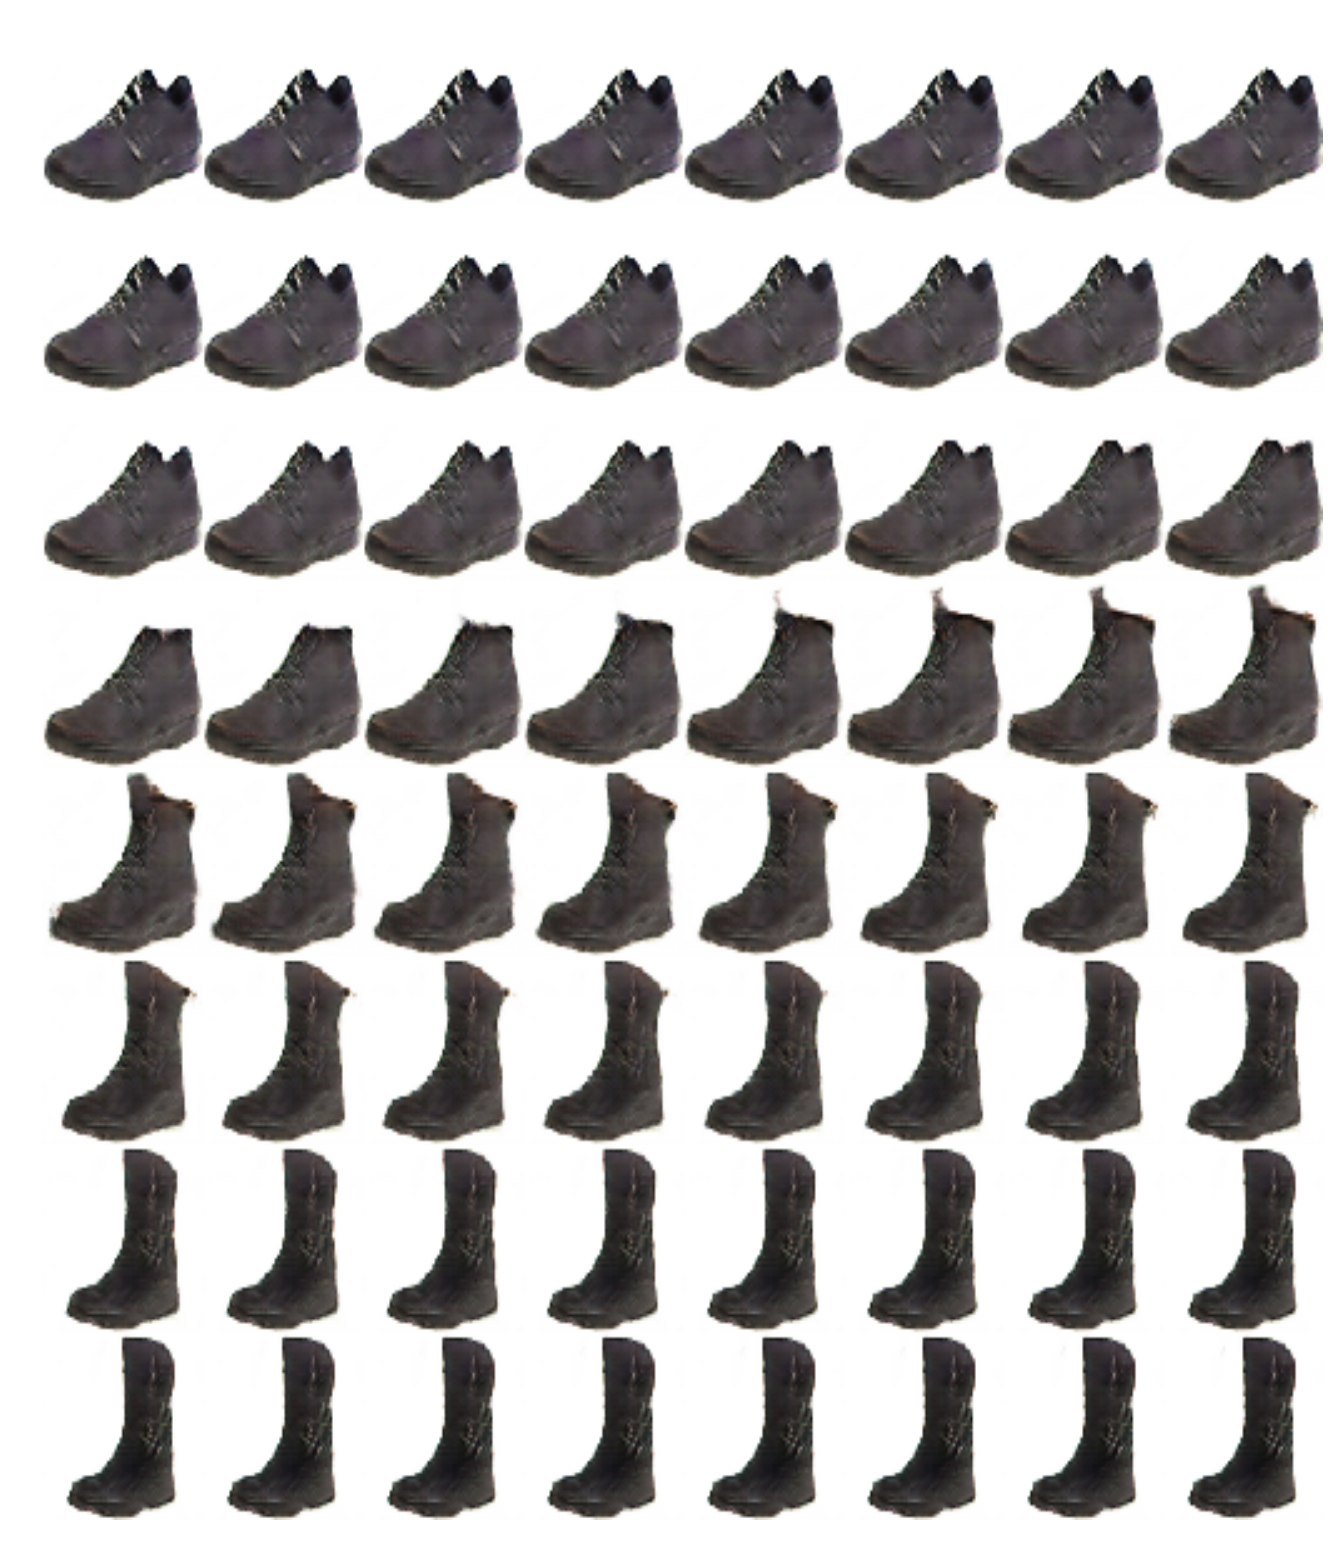

In [22]:
vis = shoes.interpolate_full(img2, img3)
aia.display_image(vis, scale=2.0)

Note that `aia.display_image` can also display nested lists of images.  If there is a `None` entry the image is simply ommitted.

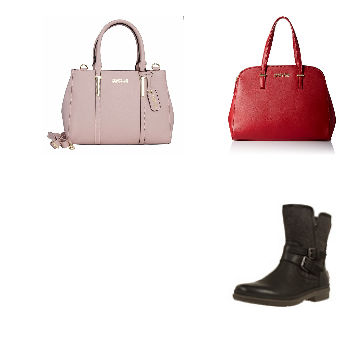

In [81]:
aia.display_image([[img0, img1], [None, img3]], scale=2.0)

Let's do a j-plot showing an analogy:

process 1 images
reconstruct 1 images using bfgs
n_iters = 201, f = 0.153
process 1 images
reconstruct 1 images using bfgs
n_iters = 201, f = 0.110
process 1 images
reconstruct 1 images using bfgs
n_iters = 197, f = 0.114


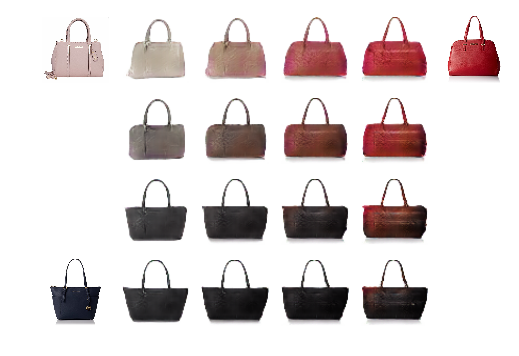

In [116]:
hb.jplot(img0, img1, img2)

And we can see the code used to generate this by executing the following cell:

In [108]:
hb.jplot??

Next up is a (failed) attempt to apply the OpenCV dense optical flow method to interpolate in a more realistic way.  

Many comments, to explain what I'm attempting to do.  It's quite possible there is a simple bug here - maybe I've messed up colors, or types or something.  But I don't immediately see it.

process 1 images
reconstruct 1 images using bfgs
n_iters = 201, f = 0.151
process 1 images
reconstruct 1 images using bfgs
n_iters = 201, f = 0.102


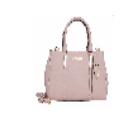

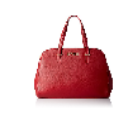

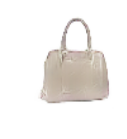

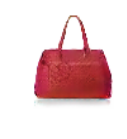

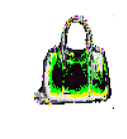

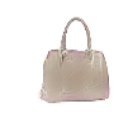

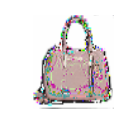

In [221]:
import numpy as np, cv2
import PIL

# Resize the handbags
img0_resized = cv2.resize(np.array(img0), (64, 64), interpolation = cv2.INTER_CUBIC)
img1_resized = cv2.resize(np.array(img1), (64, 64), interpolation = cv2.INTER_CUBIC)
aia.display_image(img0_resized)
aia.display_image(img1_resized)

# Get the latent vectors for the resized handbags
z0 = hb.get_lv(PIL.Image.fromarray(img0_resized))
z1 = hb.get_lv(PIL.Image.fromarray(img1_resized))

# Display the corresponding approximating images
img0p = hb.imagify(z0)
img1p = hb.imagify(z1)
aia.display_image(img0p)
aia.display_image(img1p)

# Find the mask between the first handbag and its approximation
# Do it in the cv2 representation
mask = cv2.cvtColor(img0_resized-img0p, cv2.COLOR_RGB2BGR)
aia.display_image(mask)

# Find and display an interpolated handbag
z = aia.serp(z0, z1, 0.1)
imgp = hb.imagify(z)
aia.display_image(imgp)

# Compute the optical flow between the first (approximating) handbag
# and the interpolated handbag
prs = cv2.cvtColor(np.array(img0p), cv2.COLOR_RGB2GRAY)
nxt = cv2.cvtColor(np.array(imgp), cv2.COLOR_RGB2GRAY)
flow = cv2.calcOpticalFlowFarneback(
    prs, nxt, 0.5, 3, 15, 3, 5, 1.1, 0)

# Apply the flow to the mask, and then add the modifed mask back onto
# the interpolated image
h, w = flow.shape[:2]
flow = -flow
flow[:,:,0] += np.arange(w)
flow[:,:,1] += np.arange(h)[:,np.newaxis]
mask_p = cv2.remap(mask, flow, None, cv2.INTER_LINEAR)
interp = imgp+cv2.cvtColor(mask_p, cv2.COLOR_BGR2RGB)
aia.display_image(interp)


In [219]:
mask[30][35]

array([57, 73, 68], dtype=uint8)